In [ ]:
from timeit import default_timer as timer
from random import *
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
def generate_numbers(size = 10000):
    return sample(range(0,size), size)

In [73]:
# Selection Sort
def selection_sort(data):
    n = len(data)
    for i in range(n-1):
        least = i
        for j in range(i+1, n):
            if (data[j] < data[least]):
                least = j
        data[i], data[least] = data[least], data[i]

In [74]:
# Insertion Sort
def insertion_sort(data):
    n = len(data)
    for i in range(1, n):
        key = data[i]
        j = i - 1
        while j >=0 and data[j] > key:
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = key

In [75]:
# Bubble Sort
def bubble_sort(data):
    n = len(data)
    for i in range(n-1, 0, -1):
        b_changed = False
        for j in range(i):
            if (data[j] > data[j + 1]):
                data[j], data[j+1] = data[j+1], data[j]
                b_changed = True
        if not b_changed: break

In [116]:
# Quick Sort
def quick_sort(data, left=0, right=None):
    if right is None:
        right = len(data) - 1
    if left < right:
        q = partition(data, left, right)
        quick_sort(data, left, q-1)
        quick_sort(data, q+1, right)

def partition(data, left, right):
    low = left + 1
    high = right
    pivot = data[left]
    while low <= high:
        while low <= right and data[low] < pivot: low += 1
        while high >= left and data[high] > pivot: high -= 1
        if low < high:
            data[low], data[high] = data[high], data[low]
    data[left], data[high] = data[high], data[left]
    return high

In [162]:
results = []
for i in range(10000, 100001, 10000):
    data = generate_numbers(i)
    sorts = {
        'Selection': selection_sort,
        'Insertion': insertion_sort,
        'Bubble': bubble_sort,
        'Quick': quick_sort
    }
    row = {'size': i}
    print(i, end=' ')
    for name, sort_func in sorts.items():
        temp = data[:]
        start = timer()
        sort_func(temp)
        end = timer()
        row[name] = (end-start)
    
    results.append(row)

df = pd.DataFrame(results)

10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 

In [165]:
df

,size,Selection,Insertion,Bubble,Quick
0,10000,1.223498,1.184384,2.992094,0.008227
1,20000,4.861914,4.947750,12.277789,0.017366
2,30000,10.853638,10.777389,26.716421,0.026259
3,40000,19.078373,19.259142,47.901127,0.037397
4,50000,30.344632,30.002636,74.868549,0.045679
5,60000,43.005961,43.110637,108.087357,0.056837
6,70000,59.009369,58.624077,148.460508,0.068213
7,80000,77.738650,78.070255,194.524429,0.079112
8,90000,98.501839,96.900496,245.943978,0.090108
9,100000,123.800739,121.691006,310.875279,0.097346


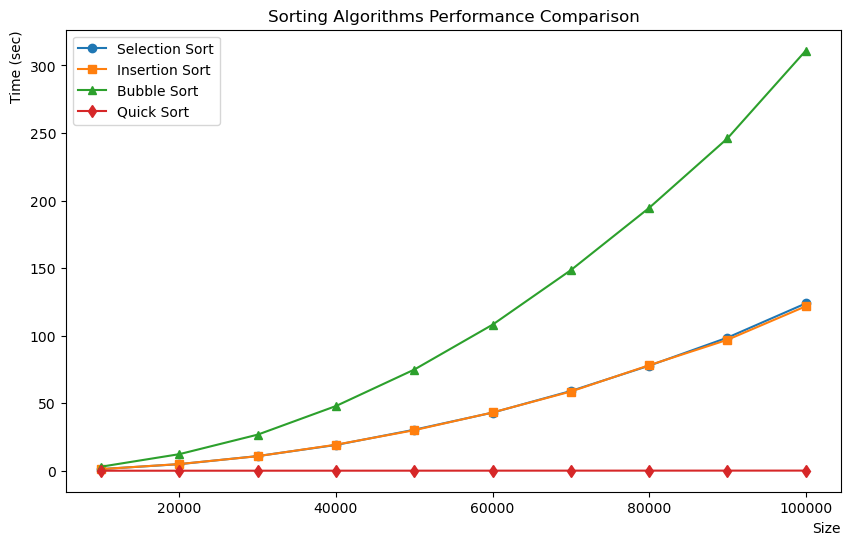

In [164]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

# 각 정렬 알고리즘에 대한 라인 그래프 추가
plt.plot(df['size'], df['Selection'], label='Selection Sort', marker='o')
plt.plot(df['size'], df['Insertion'], label='Insertion Sort', marker='s')
plt.plot(df['size'], df['Bubble'], label='Bubble Sort', marker='^')
plt.plot(df['size'], df['Quick'], label='Quick Sort', marker='d')

# 그래프 제목 및 축 레이블 설정
plt.title('Sorting Algorithms Performance Comparison')
plt.xlabel('Size', loc='right')
plt.ylabel('Time (sec)', loc='top')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()